<a href="https://colab.research.google.com/github/darkstarlegend/mlprojectipl/blob/main/ml_ipl_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [69]:
delivery=pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
match = pd.read_csv('/content/IPL_Matches_2008_2022.csv')

In [70]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [71]:
match.rename(columns = {'method':'dl_applied'}, inplace = True)

In [72]:
match.rename(columns = {'ID':'match_id'}, inplace = True)
delivery.rename(columns = {'ID':'match_id'}, inplace = True)

In [73]:
match['dl_applied']=match['dl_applied'].apply(lambda x:1 if x=='D/L' else 0)

In [74]:
match.columns

Index(['match_id', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'dl_applied', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [75]:
delivery.columns

Index(['match_id', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [76]:
#classification models which give probablities svm, logreg

In [77]:
delivery.head()

,match_id,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [78]:
total_score_df=delivery.groupby(['match_id','innings']).sum()['total_run'].reset_index()

In [79]:
total_score_df

,match_id,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [80]:
total_score_df =total_score_df[total_score_df['innings']==1]
total_score_df 

,match_id,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [81]:
match_df=match.merge(total_score_df[['match_id','total_run']],left_on='match_id',right_on='match_id')


In [82]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [83]:
match_df['Team1'] =match_df['Team1'].str.replace( 'Delhi Daredevils','Delhi Capitals')
match_df['Team2'] =match_df['Team2'].str.replace( 'Delhi Daredevils','Delhi Capitals')

match_df['Team1'] =match_df['Team1'].str.replace( 'Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] =match_df['Team2'].str.replace( 'Deccan Chargers','Sunrisers Hyderabad')

In [84]:
match_df['Team1'] =match_df['Team1'].str.replace( 'Rising Pune Supergiants','Rising Pune Supergiant')
match_df['Team2'] =match_df['Team2'].str.replace( 'Rising Pune Supergiants','Rising Pune Supergiant')

In [85]:
match_df['Team1'] =match_df['Team1'].str.replace( 'Kings XI Punjab','Punjab Kings')
match_df['Team2'] =match_df['Team2'].str.replace( 'Kings XI Punjab','Punjab Kings')

In [86]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [87]:
teams=['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [88]:
match_df=match_df[match_df['Team1'].isin(teams)]
match_df=match_df[match_df['Team2'].isin(teams)]

In [89]:
match_df.shape

(835, 21)

In [90]:
match_df.columns

Index(['match_id', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'dl_applied', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'total_run'],
      dtype='object')

In [91]:
match_df=match_df[match_df['dl_applied']==0]
match_df.head(5)

,match_id,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,dl_applied,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157


In [92]:
match_df=match_df[['match_id', 'City', 'WinningTeam','total_run','Team1','Team2']]

In [93]:
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [94]:
delivery_df=delivery_df[delivery_df['innings']==2]

In [95]:
delivery_df.shape

(95083, 22)

In [96]:
delivery_df.head(3)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans


In [97]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_run_y']

In [98]:
delivery_df.head(5)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [99]:
delivery_df['runs_left']=delivery_df['total_run_x']-delivery_df['current_score']
delivery_df.head(5)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129


In [100]:
delivery_df['balls_left'] =126 - (delivery_df['overs']*6 +delivery_df['ballnumber'])

In [101]:
delivery_df.head(5)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,125
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,130,124
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,123
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,122
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,129,121


In [102]:
delivery_df.columns

Index(['match_id', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2',
       'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'current_score', 'runs_left',
       'balls_left'],
      dtype='object')

In [103]:
delivery_df['player_out']=delivery_df['player_out'].fillna("0")
delivery_df['player_out']=delivery_df['player_out'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_out']=delivery_df['player_out'].astype('int')
wickets =delivery_df.groupby('match_id').cumsum()['player_out'].values
delivery_df['wickets']=10-wickets
delivery_df.head(5)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,125,10
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,0,130,124,10
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,123,10
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,122,10
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,Gujarat Titans,1,129,121,10


In [104]:
delivery_df['crr'] =(delivery_df['current_score'])/(delivery_df['overs'] +delivery_df['ballnumber']/6 )
#(delivery_df['current_score'])/(delivery_df['overs'] +delivery_df['ballnumber']/6 )

In [105]:
delivery_df['rrr'] =(delivery_df['runs_left']*6)/(delivery_df['balls_left'] )

In [106]:
delivery_df.head(5)

,match_id,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,crr,rrr
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,NaN,NaN,Gujarat Titans,0,130,125,10,0.0,6.240000
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,NaN,NaN,Gujarat Titans,0,130,124,10,0.0,6.290323
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,NaN,NaN,Gujarat Titans,1,129,123,10,2.0,6.292683
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,1,129,122,10,1.5,6.344262
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,1,129,121,10,1.2,6.396694


In [161]:
delivery_df['match_id'].sample()

132366    548377
Name: match_id, dtype: int64

In [107]:
def result(row):
  return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [108]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [109]:
def bowling(row):
  if row['BattingTeam'] == row['Team1']:
    row['BowlingTeam']=row['Team2']
  else :
    row['BowlingTeam']=row['Team1']
  return row['BowlingTeam']

In [110]:
delivery_df['bowling team']=delivery_df.apply(bowling,axis=1)

In [111]:
delivery_df.columns

Index(['match_id', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2',
       'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_run_y',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets', 'crr', 'rrr', 'result', 'bowling team'],
      dtype='object')

In [112]:
final_df = delivery_df[['BattingTeam' , 'bowling team' , 'City' , 'runs_left' , 'balls_left' , 'wickets' , 'total_run_x' , 'crr' , 'rrr' , 'result' ]]
final_df

,BattingTeam,bowling team,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,125,10,130,0.000000,6.240000,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,124,10,130,0.000000,6.290323,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,123,10,130,2.000000,6.292683,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,122,10,130,1.500000,6.344262,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,121,10,130,1.200000,6.396694,1
...,...,...,...,...,...,...,...,...,...,...
196449,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,37,1,222,5.393258,23.027027,0
196450,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,36,1,222,5.400000,23.500000,0
196451,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,35,1,222,5.340659,24.171429,0
196452,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,140,35,1,222,5.406593,24.000000,0


In [113]:
final_df = final_df.sample(final_df.shape[0])

In [114]:
final_df.sample()

,BattingTeam,bowling team,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
179824,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,103,100,10,139,8.307692,6.18,1


In [115]:
final_df.dropna(inplace=True)

In [116]:
final_df = final_df[final_df['balls_left'] != 0]

In [117]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [118]:
X_train

,BattingTeam,bowling team,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
169902,Rajasthan Royals,Mumbai Indians,Mumbai,19,19,5,212,10.822430,6.000000
149312,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,169,118,9,175,4.500000,8.593220
193976,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,130,121,9,135,6.000000,6.446281
164478,Chennai Super Kings,Rajasthan Royals,Ahmedabad,157,107,10,177,6.315789,8.803738
178332,Delhi Daredevils,Chennai Super Kings,Johannesburg,142,104,8,163,5.727273,8.192308
...,...,...,...,...,...,...,...,...,...
54099,Chennai Super Kings,Kolkata Knight Riders,Kolkata,105,78,8,161,7.000000,8.076923
170361,Royal Challengers Bangalore,Sunrisers Hyderabad,Johannesburg,69,63,7,143,7.047619,6.571429
195719,Royal Challengers Bangalore,Mumbai Indians,Mumbai,60,47,7,165,7.974684,7.659574
91742,Delhi Daredevils,Delhi Capitals,Raipur,103,111,9,119,6.400000,5.567568


In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','bowling team','City'])
]
,remainder='passthrough')

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [121]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [122]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam',
                                                   'bowling team', 'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [123]:
y_pred = pipe.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8165029469548134

In [125]:
pipe.predict_proba(X_test)[10]

array([0.56853887, 0.43146113])

In [126]:
def match_summary(row):
    print("BattingTeam-" + row['BattingTeam'] + " | bowling team-" + row['bowling team'] + " | Target- " + str(row['total_run_x']))

In [155]:
#x_df=delivery_df
#match_id=1312200
#pipe=pipe

def match_progression(x_df,match_id,pipe):
  match = x_df[x_df['match_id'] == match_id]
  match = match[(match['ballnumber'] == 6)]
  temp_df = match[['BattingTeam' , 'bowling team' , 'City' , 'runs_left' , 'balls_left' , 'wickets' , 'total_run_x' , 'crr' , 'rrr' , 'result' ]].dropna()
  temp_df = temp_df[temp_df['balls_left'] != 0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100,1)
  temp_df['win'] = np.round(result.T[1]*100,1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
  target = temp_df['total_run_x'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
  wickets = list(temp_df['wickets'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
  print("Target-",target)
  temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
  return temp_df,target


In [163]:
delivery_df['match_id'].unique()

array([1312200, 1312199, 1312198, 1312197, 1304116, 1304115, 1304114,
       1304113, 1304112, 1304111, 1304110, 1304109, 1304108, 1304107,
       1304106, 1304105, 1304104, 1304103, 1304102, 1304101, 1304100,
       1304099, 1304098, 1304097, 1304096, 1304095, 1304094, 1304093,
       1304092, 1304091, 1304090, 1304089, 1304088, 1304087, 1304086,
       1304085, 1304084, 1304083, 1304082, 1304081, 1304080, 1304079,
       1304078, 1304077, 1304076, 1304075, 1304074, 1304073, 1304072,
       1304071, 1304070, 1304069, 1304068, 1304067, 1304066, 1304065,
       1304064, 1304063, 1304062, 1304061, 1304060, 1304059, 1304058,
       1304057, 1304056, 1304055, 1304054, 1304053, 1304052, 1304051,
       1304050, 1304049, 1304048, 1304047, 1254117, 1254116, 1254115,
       1254114, 1254101, 1254088, 1254106, 1254094, 1254095, 1254093,
       1254110, 1254090, 1254109, 1254112, 1254089, 1254102, 1254091,
       1254103, 1254099, 1254092, 1254100, 1254098, 1254108, 1254097,
       1254107, 1254

In [164]:
temp_df,target = match_progression(delivery_df,1082639,pipe)
temp_df


Target- 167


,end_of_over,runs_after_over,wickets_in_over,lose,win
76059,1,14,0,31.2,68.8
76065,2,11,0,25.7,74.3
76071,3,6,0,25.3,74.7
76077,4,8,1,34.2,65.8
76083,5,10,0,28.3,71.7
76089,6,12,0,21.0,79.0
76095,7,3,0,23.0,77.0
76101,8,4,0,24.3,75.7
76107,9,7,0,22.5,77.5
76114,10,4,2,50.7,49.3


Text(0.5, 1.0, 'Target-167')

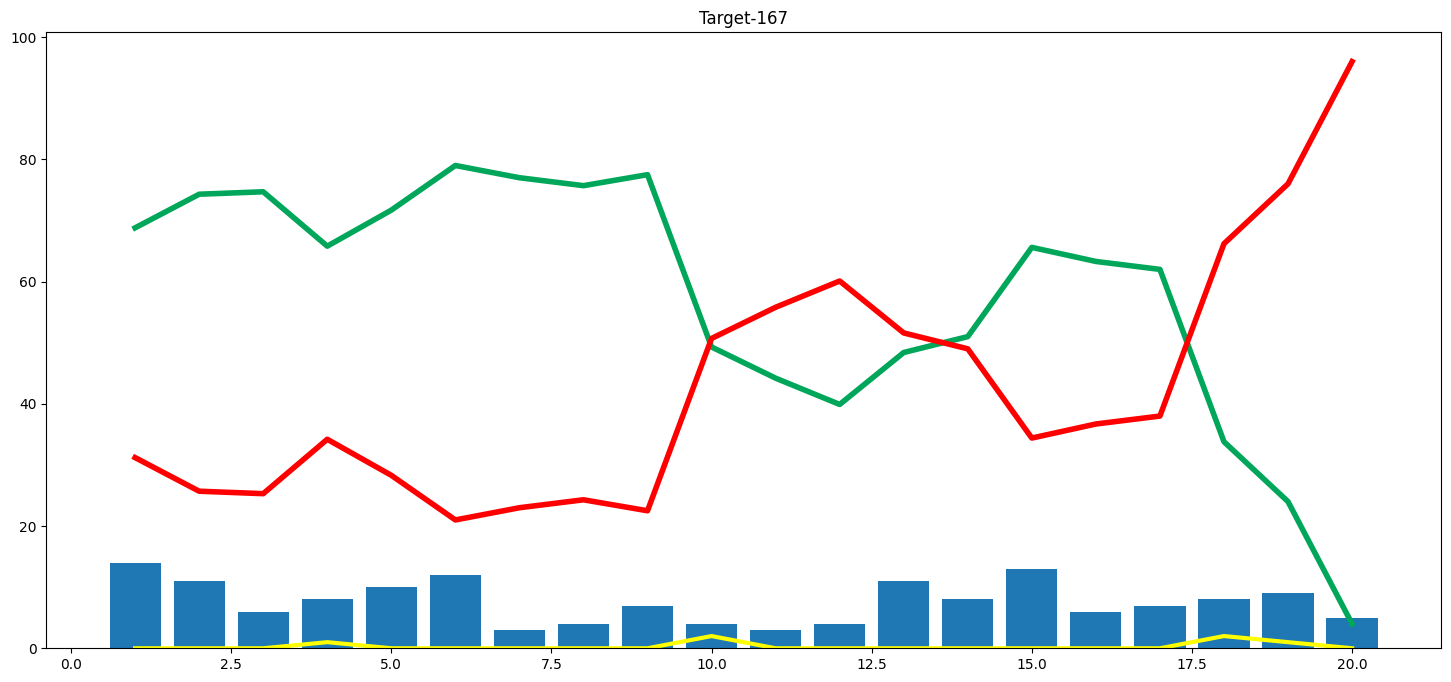

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [166]:
teams

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [168]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [169]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))